In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
# Categorical columns
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [13]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)

In [15]:
df.drop('Loan_ID',inplace=True,axis=1)

In [17]:
df = pd.get_dummies(df, columns=["Gender"], prefix="Sex")

In [19]:
nominal_cols = [ "Self_Employed", "Property_Area"]
df= pd.get_dummies(df, columns=nominal_cols)

In [27]:
df['Education']=LE.fit_transform(df['Education'])
df['Married']=LE.fit_transform(df['Married'])
df

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Sex_Female,Sex_Male,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5720,0,110.0,360.0,1.0,False,True,True,False,False,False,True
1,1,1,0,3076,1500,126.0,360.0,1.0,False,True,True,False,False,False,True
2,1,2,0,5000,1800,208.0,360.0,1.0,False,True,True,False,False,False,True
3,1,2,0,2340,2546,100.0,360.0,1.0,False,True,True,False,False,False,True
4,0,0,1,3276,0,78.0,360.0,1.0,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,3,1,4009,1777,113.0,360.0,1.0,False,True,False,True,False,False,True
363,1,0,0,4158,709,115.0,360.0,1.0,False,True,True,False,False,False,True
364,0,0,0,3250,1993,126.0,360.0,1.0,False,True,True,False,False,True,False
365,1,0,0,5000,2393,158.0,360.0,1.0,False,True,True,False,True,False,False


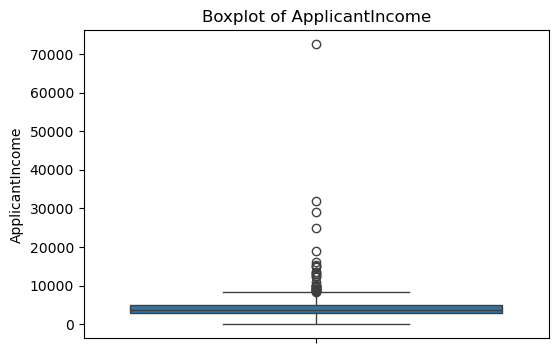

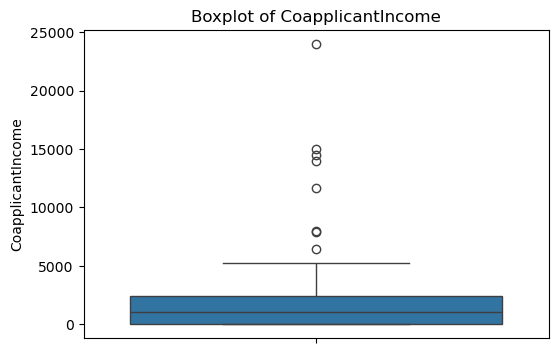

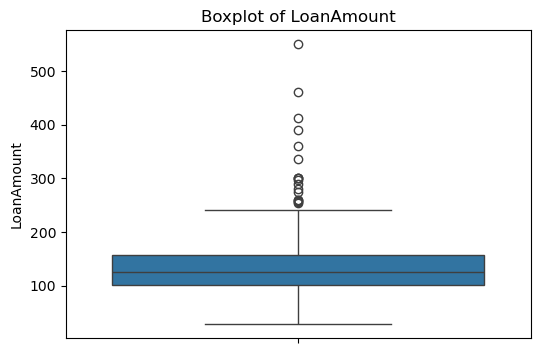

In [29]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [31]:
Q1 = np.percentile(df['ApplicantIncome'], 25)
Q3 = np.percentile(df['ApplicantIncome'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['ApplicantIncome'].median()
Cond1=df['ApplicantIncome']>UB
Cond2=df['ApplicantIncome']<LB
df['ApplicantIncome']= np.where(Cond1 | Cond2, med, df['ApplicantIncome'])

In [33]:
Q1 = np.percentile(df['CoapplicantIncome'], 25)
Q3 = np.percentile(df['CoapplicantIncome'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['CoapplicantIncome'].median()
Cond1=df['CoapplicantIncome']>UB
Cond2=df['CoapplicantIncome']<LB
df['CoapplicantIncome']= np.where(Cond1 | Cond2, med, df['CoapplicantIncome'])

In [35]:
Q1 = np.percentile(df['LoanAmount'], 25)
Q3 = np.percentile(df['LoanAmount'], 75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
LB = Q1 - 1.5 * IQR
med=df['LoanAmount'].median()
Cond1=df['LoanAmount']>UB
Cond2=df['LoanAmount']<LB
df['LoanAmount']= np.where(Cond1 | Cond2, med, df['LoanAmount'])

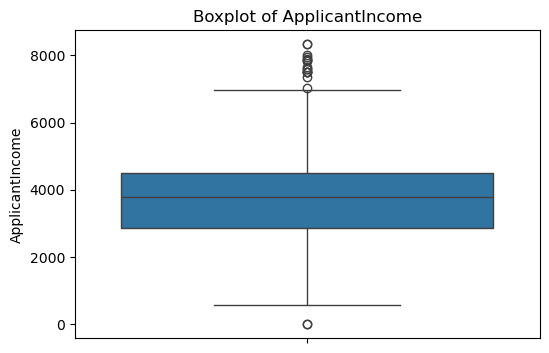

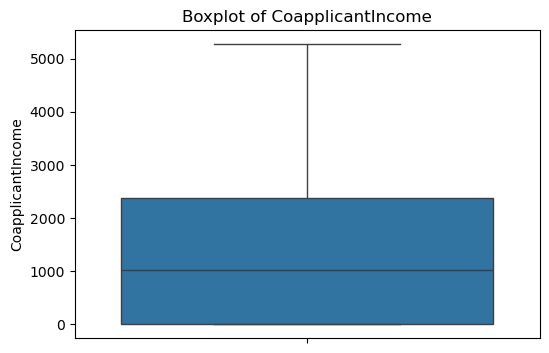

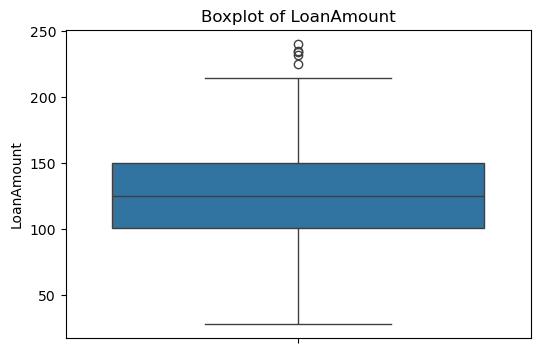

In [37]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [41]:
df.dtypes

Married                      int32
Dependents                   int32
Education                    int32
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Sex_Female                    bool
Sex_Male                      bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

In [43]:
import pickle

In [45]:
model_path='analytics_model'
saved_model=pickle.load(open(model_path,'rb'))
saved_model

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=5)

In [52]:
X=df

In [72]:
y_pred=saved_model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [60]:
df.shape

(367, 15)

In [62]:
df=pd.read_csv("test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
final_prediction=df['Loan_ID']

In [68]:
final_prediction

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [118]:
Test_output=pd.DataFrame(zip(final_prediction,y_pred),columns=['Loan_ID','Loan_status'])
Test_output


,Loan_ID,Loan_status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [120]:
Test_output['Loan_status']=np.where(Test_output['Loan_status']==1,'Y','N')

In [141]:
Test_output['Loan_status'].value_counts()

Loan_status
Y    285
N     82
Name: count, dtype: int64

In [143]:
Test_output.to_csv('Analytics_bidhya_loan_pred.csv', index=False)


In [145]:
model_path='analytics_model_logistic'
saved_model=pickle.load(open(model_path,'rb'))
saved_model

LogisticRegression(C=0.01, l1_ratio=0, max_iter=200, penalty=None)

In [147]:
y_pred=saved_model.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [149]:
Test_output['Loan_status']=np.where(Test_output['Loan_status']==1,'Y','N')

In [159]:
Test_output=pd.DataFrame(zip(final_prediction,y_pred),columns=['Loan_ID','Loan_Status'])
Test_output


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [167]:
Test_output['Loan_Status']=np.where(Test_output['Loan_Status']==1,'Y','N')

In [169]:
Test_output

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [173]:
Test_output.to_csv('Analytics_bidhya_loan_pred_logistic_final.csv', index=False)
